<a href="https://colab.research.google.com/github/Mulac/TDA-MNIST/blob/master/approach_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/pytorch/examples/blob/master/mnist/main.py

https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

https://towardsdatascience.com/deep-learning-with-pytorch-a93b09bdae96

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import numpy as np 
import matplotlib.pyplot as plt

*Hyper parameters*

In [ ]:
BATCH_SIZE = 5

## Prepare Data
1. Download data and apply tranformations

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
train = torchvision.datasets.MNIST('./data/train', train=True, transform=transform, download=True)
valid = torchvision.datasets.MNIST('./data/valid', train=False, transform=transform, download=True)

2. Check the data has right number of examples

In [ ]:
print(train)
print(valid)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/train
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/valid
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


3. Show the first training example and corresponding label (target)

Shape: torch.Size([28, 28])
Label: 5


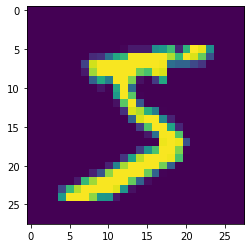

In [ ]:
example = 0

img, label = train.data[example], train.targets[example]
print("Shape:", img.shape)
print("Label:", label.item())
plt.imshow(img)


4. Package into a dataloader object ready to send to the model

In [ ]:
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid)

## Create Model
Two ways to do this.  Either by inheriting from the Module class or by using nn.Sequential

In [ ]:
torchvision.models.vgg16().features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [300]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 3)
    #self.conv2 = nn.Conv2d(in_channels = 10, out_channels = 20, kernel_size = 3)

    self.lin = nn.Linear(26*26*10, 10)

    
  def forward(self, input):
    result = self.conv1(input)
    result = F.relu(result)

    #result = self.conv2(result)
   # result = F.relu(result)

    result = result.view(-1, 26*26*10)
    result = self.lin(result)

    #softmax lower case
    return F.softmax(result, dim = 1)

Checking the models output from the frist training example

### Choose loss function and optimiser
e.g. Mean Squared Error (MSE) with Stochastic Gradient Decent (SGD)

In [301]:
model = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Define training loop

Grab batch from data loader; make model predictions; calculate loss; compute gradients; update weights;

In [ ]:
def train():
  total = 0
  correct = 0
  for images, labels in train_loader:
    predictions = model(images)
    loss = criterion(predictions, labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    total += BATCH_SIZE
    correct += (torch.argmax(predictions,dim=1) == labels).sum().item()
  print("Accuracy: " + str(correct/total * 100))

### Execute training loop
Can be in a for loop for multiple epochs (number of passes through the whole dataset)

In [ ]:
epochs = 3
for epoch in range(epochs):
  train()
  

Accuracy: 56.93666666666667
Accuracy: 85.07166666666667
Accuracy: 89.99166666666667


### Evaluate Model
Uses the validation set to test the model

In [ ]:
#valid_loader not using batch size 5 so error thrown



# When performing evaluation it's good to work in the torch.no_grad context,
# this will save memory and won't compute any gradients
#
# We would also need to switch the network into evaluation mode before this 
# when we start adding more layers that behave differently for training like
# Dropout and Batchnorm layers.  Don't forget to switch back to training mode.

#model.eval()
#model.train()

with torch.no_grad():
  image, label = next(iter(valid_loader))
print(image.size())

def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = max(model(images))
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

  print(get_all_preds(model, valid_loader))
  print(get_all_preds(model, valid_loader).size()
  output = model(image)
  print(torch.max(output,1)[1].item())

IndentationError: ignored

In [ ]:
plt.imshow(image.squeeze())  

In [ ]:
model

In [311]:
class LayerVisualisation():
  """ 
    Produces an image that maximally excites a convolutional opertation
    for a specific layer and filter.
  """

  def __init__(self, model, layer):
    self.model = model
    self.model.eval()
    self.sel_layer = list(self.model.children())[layer]
    self.hook = self.sel_layer.register_forward_hook(self.hook_fn)

  def hook_fn(self, module, input, output):
    self.activations = output

  def activation_map(self, filter_id):
    return self.activations[0, filter_id]

  def visualise_filter(self, filter_id, lr=0.01, steps=30):
    random_image = torch.rand((28, 28))
  
  def close(self):
    self.hook.remove()

In [312]:
conv_layer = LayerVisualisation(model, 0)

In [313]:
with torch.no_grad():
  image, label = next(iter(valid_loader))
  model(image)

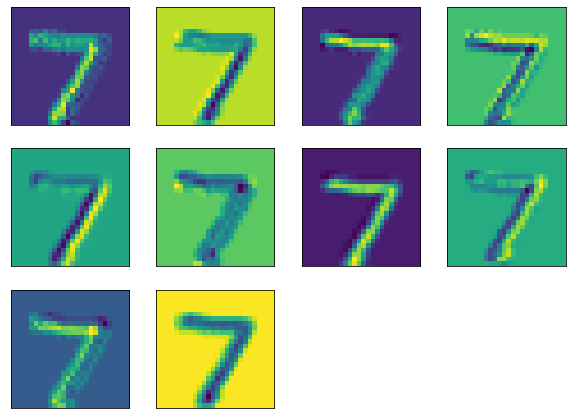

In [317]:
fig = plt.figure(figsize=(10, 10)) 

for filter in range(10):
    ax = fig.add_subplot(4, 4, filter+1, xticks=[], yticks=[])
    ax.imshow(conv_layer.activation_map(filter))